In [1]:
import sys 
sys.path.append('../src/')

In [2]:
from GA_Clustering import GACluster
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("test.csv")

In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
features = df.columns[:-1].tolist()
x = df[features]

In [6]:
scaler = MinMaxScaler().fit(df[features])
x = pd.DataFrame(scaler.transform(df[features]))
x.columns = features

In [7]:
pca = PCA()
pca.fit(x)
x_pca = pd.DataFrame(pca.transform(x))

In [8]:
pca_columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]
x_pca.columns=pca_columns

In [9]:
num_features = x.shape[1]

In [10]:
print('explained_variance_ratio_  ')
for i, evr in zip(range(1, num_features+1), pca.explained_variance_ratio_):
    print("pca%d: %.10f"%(i,evr))
print()

explained_variance_ratio_  
pca1: 0.6560028444
pca2: 0.0407299718
pca3: 0.0276658728
pca4: 0.0189158007
pca5: 0.0162453215
pca6: 0.0150917900
pca7: 0.0103862371
pca8: 0.0087842450
pca9: 0.0082843081
pca10: 0.0076255418
pca11: 0.0074117347
pca12: 0.0070805981
pca13: 0.0060795842
pca14: 0.0056628483
pca15: 0.0052483640
pca16: 0.0051648128
pca17: 0.0047001270
pca18: 0.0046517555
pca19: 0.0040349305
pca20: 0.0038410562
pca21: 0.0037511000
pca22: 0.0034452693
pca23: 0.0034288823
pca24: 0.0032292556
pca25: 0.0031403009
pca26: 0.0031071168
pca27: 0.0030396717
pca28: 0.0029634517
pca29: 0.0027898545
pca30: 0.0026988682
pca31: 0.0026245269
pca32: 0.0024072391
pca33: 0.0023415152
pca34: 0.0022528157
pca35: 0.0022034803
pca36: 0.0020298609
pca37: 0.0020016433
pca38: 0.0019575280
pca39: 0.0018760264
pca40: 0.0018135144
pca41: 0.0017653365
pca42: 0.0017173055
pca43: 0.0016814491
pca44: 0.0016039758
pca45: 0.0015752363
pca46: 0.0015045376
pca47: 0.0014821932
pca48: 0.0014520041
pca49: 0.0013955611
p

In [11]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.65600284 0.69673282 0.72439869 0.74331449 0.75955981 0.7746516
 0.78503784 0.79382208 0.80210639 0.80973193 0.81714367 0.82422427
 0.83030385 0.8359667  0.84121506 0.84637988 0.85108    0.85573176
 0.85976669 0.86360774 0.86735884 0.87080411 0.874233   0.87746225
 0.88060255 0.88370967 0.88674934 0.88971279 0.89250265 0.89520152
 0.89782604 0.90023328 0.9025748  0.90482761 0.90703109 0.90906095
 0.9110626  0.91302012 0.91489615 0.91670967 0.918475   0.92019231
 0.92187376 0.92347773 0.92505297 0.92655751 0.9280397  0.9294917
 0.93088726 0.93226512 0.93361528 0.93490288 0.93617567 0.93741714
 0.93861439 0.93980549 0.94097477 0.94207262 0.94314234 0.94419495
 0.94522657 0.94623781 0.94723258 0.94821066 0.94915732 0.95008942
 0.95100115 0.95189985 0.95277646 0.95363088 0.95447739 0.95530803
 0.9561056  0.95688372 0.9576439  0.95838934 0.9591231  0.95982544
 0.96052261 0.96120143 0.96187983 0.96253827 0.96318657 0.96382659
 0.96445406 0.96507375 0.965669   0.96625687 0.96684218 0.967419

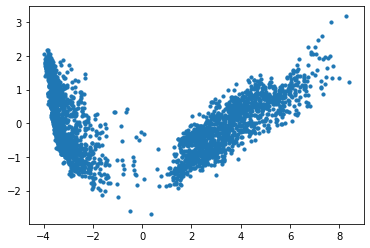

In [12]:
plt.scatter(x_pca['pca1'], x_pca['pca2'], s=10, marker='o')

<h2> Parametri za testiranje </h2>

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_SSE | K_means silhouette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    4    | roulette |  /     |   0.05        |      2       |    22641         |   0.498 | 19748 | 0.387 |
| 4      |    4    | roulette |  /     |   0.1        |      2       |    18080         |   0.2 | 19748 | 0.387 |
| 4      |    4    | tournament |  2     |   0.05        |      2       |    19757         |   0.359 | 19748 | 0.387 |
| 10      |    10    | tournament |    2   |   0.1        |      2       |    15688         |   0.092 | 19748 | 0.387 |

<h3> 1) </h3>

In [13]:
model = GACluster(n_clusters=2, max_iter=10, population_size=4, mutation_rate=0.05, elitism_size=2)

<Figure size 720x180 with 0 Axes>

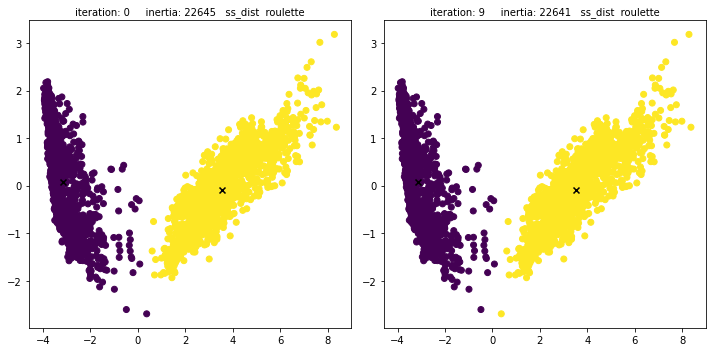

In [14]:
model.fit(x_pca)

In [15]:
model.inertia_

22641.306749497347

In [16]:
silhouette_score(x_pca, labels=model.labels_)

0.4984051529160117

<h3> 2) </h3>

In [17]:
model = GACluster(n_clusters=4, max_iter=4, population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

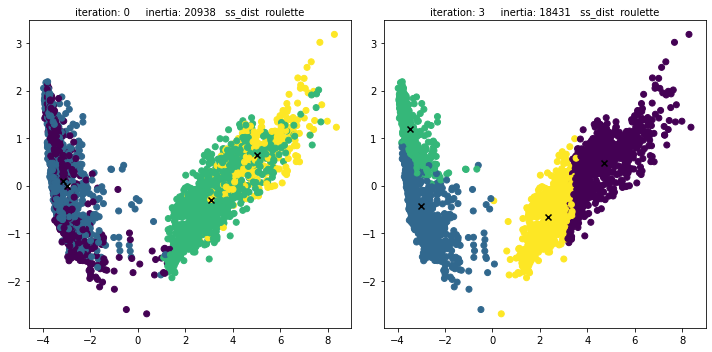

In [18]:
model.fit(x_pca)

In [19]:
model.inertia_

18431.307964416723

In [20]:
silhouette_score(x_pca, labels=model.labels_)

0.17671741147180747

<h3> 3) </h3>

In [21]:
model = GACluster(n_clusters=3, max_iter=6, category='tournament', population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

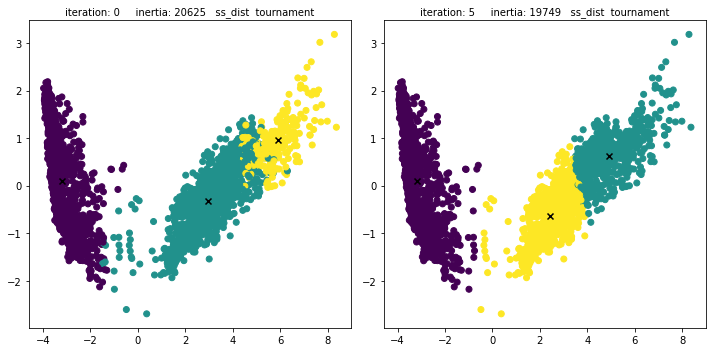

In [22]:
model.fit(x_pca)

In [23]:
model.inertia_

19749.267642236806

In [24]:
silhouette_score(x_pca, labels=model.labels_)

0.35278470685953217

<h3> 4) </h3>

In [25]:
model = GACluster(n_clusters=9, max_iter=4, category='tournament', population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

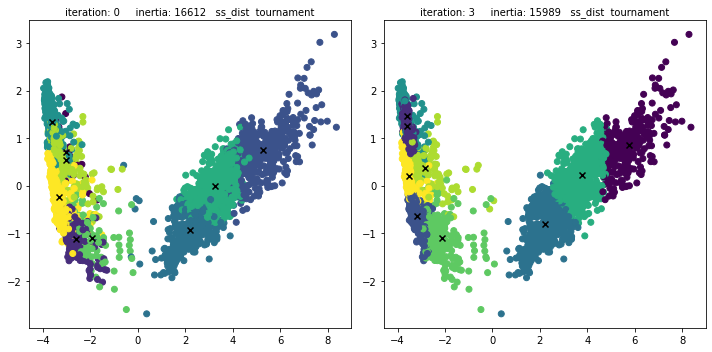

In [26]:
model.fit(x_pca)

In [27]:
model.inertia_

15988.840215622811

In [28]:
silhouette_score(x_pca, labels=model.labels_)

0.08760469176089222

## KMeans

In [29]:
clusters = 3
model = KMeans(n_clusters=clusters)

In [30]:
model.fit(x_pca)

KMeans(n_clusters=3)

In [31]:
x_pca['labels'] = model.labels_
model.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [32]:
colors = ['red', 'green', 'blue']

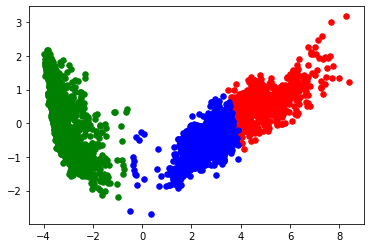

In [35]:
for j in range(0, clusters):
    cluster= x_pca.loc[lambda x: x['labels'] == j, :]
    plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=30, marker='o', label="klaster %d"%j)

In [36]:
model.inertia_

19748.68758511227

In [37]:
silhouette_score(x_pca, model.labels_)

0.3872538808691078